# Stratification

Developer: Seyed.kahaki@fda.hhs.gov

When preparing datasets for machine learning, it is crucial to ensure that the training, validation, and test sets reflect the overall class distribution. **Stratification** is a technique used to split data such that each subset maintains the same proportion of classes (or subcategories) as the original dataset.

In this notebook, we explore both **random** and **stratified** data splitting strategies using the **BreakHis** breast cancer histopathology dataset. We apply stratification at two levels:

- **Category level**: *benign* vs *malignant*
- **Subtype level**: specific tumor types within each category

This approach helps create a more balanced and representative distribution across all data splits, which is especially important when working with **imbalanced datasets** in medical imaging.


# import necessary libraraies

In [2]:
#!pip install seaborn 

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from WSI.stratification import stratification 

## **About Dataset**

### **Context**
**Invasive Ductal Carcinoma (IDC)** is the **most common subtype of breast cancer**. When assigning an **aggressiveness grade** to a whole-mount histopathology slide, **pathologists focus on regions containing IDC**. As a result, a common **pre-processing step** for automated aggressiveness grading and cancer detection is to **accurately delineate IDC regions** within whole-slide images.

### **Content**
The original dataset consists of **162 whole-mount breast cancer histopathology slides**, scanned at **40× magnification**. From these slides, a total of **277,524 image patches** of size **50 × 50 pixels** were extracted:

- **198,738 IDC-negative (non-IDC) patches**
- **78,786 IDC-positive (IDC) patches**

All image patches are stored in **PNG format** and represent **RGB histopathological regions**.

### **Acknowledgements**
The original dataset files are available at:  
**http://gleason.case.edu/webdata/jpi-dl-tutorial/IDC_regular_ps50_idx5.zip**

**Citations:**
- **https://www.ncbi.nlm.nih.gov/pubmed/27563488**
- **http://spie.org/Publications/Proceedings/Paper/10.1117/12.2043872**

### **Inspiration**
**Breast cancer** is the **most common cancer in women**, and **Invasive Ductal Carcinoma (IDC)** is its **most prevalent subtype**. Accurate identification and categorization of **IDC regions** is a **critical clinical task**. **Automated image analysis methods** can help **reduce diagnostic workload**, **improve consistency**, and **support large-scale histopathological studies**.


In [20]:
from WSI.stratification import stratification  # adjust import if needed

# CSV path
csv_path = input(
    "Enter the CSV file of your dataset (e.g., ./data/BreakHis.csv): "
) or "./data/BreakHis.csv"

# OPTIONAL: only if filename column is relative
base_dir = None  # or "/path/to/dataset_root"

# Create stratification object
s = stratification(csv_path=csv_path, base_dir=base_dir)

# Basic inspection
print(s.df.head())
print("\nColumns:", s.df.columns.tolist())

# Category-level info
print("\nCategories:")
print(s.df["category"].unique())
print(s.df["category"].value_counts())

# Subtype hierarchy per category (IMPORTANT)
print("\nSubtypes per category:")
for cat in sorted(s.df["category"].unique()):
    subtypes = sorted(s.df.loc[s.df["category"] == cat, "subtype"].unique())
    counts = s.df.loc[s.df["category"] == cat, "subtype"].value_counts()
    print(f"\nCategory: {cat}")
    print("  Subtypes:", subtypes)
    print("  Counts:")
    print(counts)

Enter the CSV file of your dataset (e.g., ./data/BreakHis.csv):  


   fold  mag    grp                                         image_path  \
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
1     2  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
2     3  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
3     4  100   test  BreaKHis_v1/histology_slides/breast/benign/SOB...   
4     5  100   test  BreaKHis_v1/histology_slides/breast/benign/SOB...   

  category   subtype  
0   benign  adenosis  
1   benign  adenosis  
2   benign  adenosis  
3   benign  adenosis  
4   benign  adenosis  

Columns: ['fold', 'mag', 'grp', 'image_path', 'category', 'subtype']

Categories:
['benign' 'malignant']
category
malignant    27145
benign       12400
Name: count, dtype: int64

Subtypes per category:

Category: benign
  Subtypes: ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma']
  Counts:
subtype
fibroadenoma       5070
tubular_adenoma    2845
phyllodes_tumor    2265
adenosis           2220
Nam

# Original dataset category distribution

C:\Users\patelt6\OneDrive - National Institutes of Health\DataPath_ValidPath\DataPath-main\DataPath\WSI\stratification.py:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette="Set2")


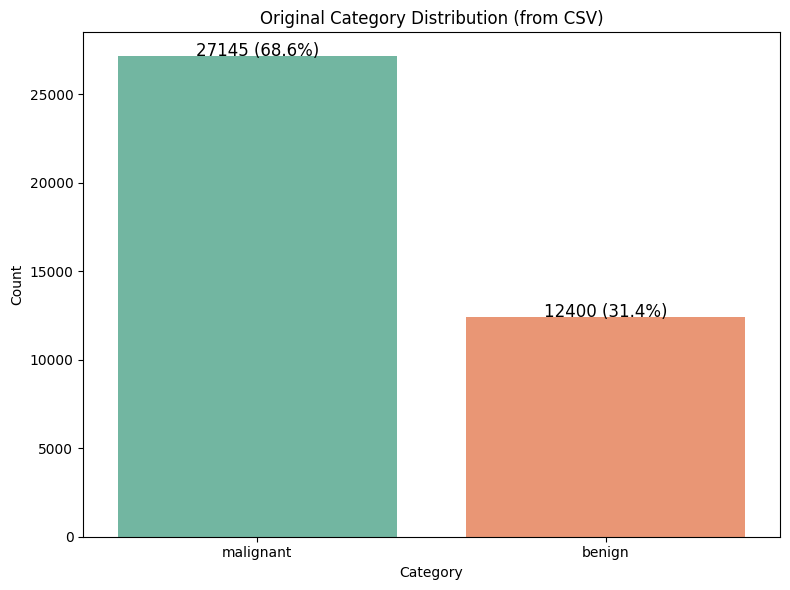

In [21]:
strat = stratification(csv_path=csv_path, base_dir=base_dir)

# Visualize category distribution (benign vs malignant)
strat.plot_category_distribution(strat.df, "Original Category Distribution (from CSV)")

# Random split by category

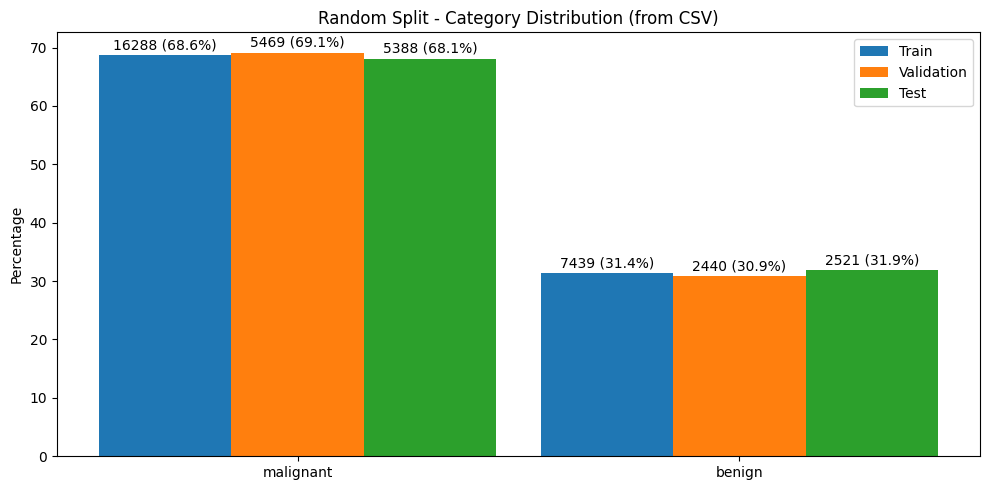

In [22]:
# Random split by category
train_cat_r, val_cat_r, test_cat_r = strat.split_random_by_category()

# Count category distribution in each split
cat_random_splits = {
    "Train": train_cat_r["category"].value_counts().to_dict(),
    "Validation": val_cat_r["category"].value_counts().to_dict(),
    "Test": test_cat_r["category"].value_counts().to_dict()
}

# Plot category distribution across splits
strat.plot_category_split_distribution(
    cat_random_splits,
    "Random Split - Category Distribution (from CSV)"
)

# Stratified split by category

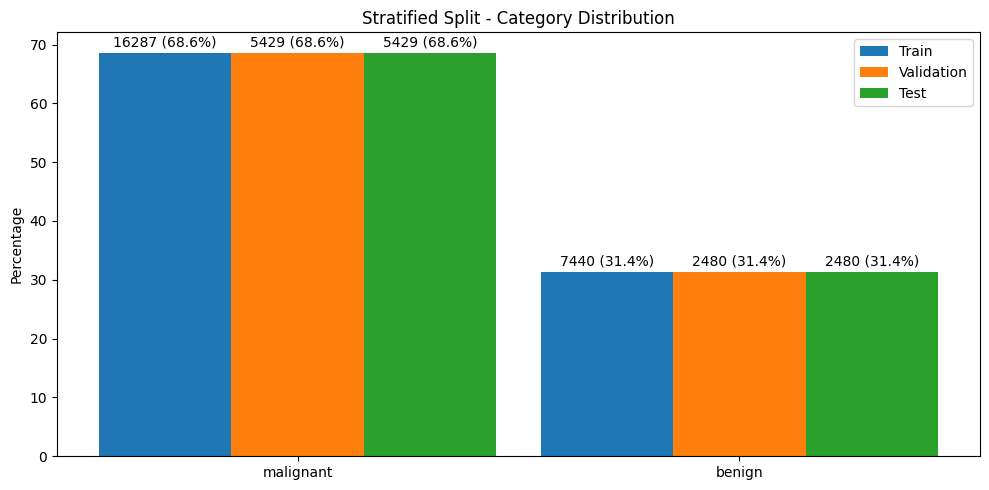

In [23]:
# Stratified split by category
train_cat_s, val_cat_s, test_cat_s = strat.split_stratified_by_category()
cat_stratified_splits = {
    "Train": train_cat_s["category"].value_counts().to_dict(),
    "Validation": val_cat_s["category"].value_counts().to_dict(),
    "Test": test_cat_s["category"].value_counts().to_dict()
}
strat.plot_category_split_distribution(cat_stratified_splits, "Stratified Split - Category Distribution")

# Random split by sub category

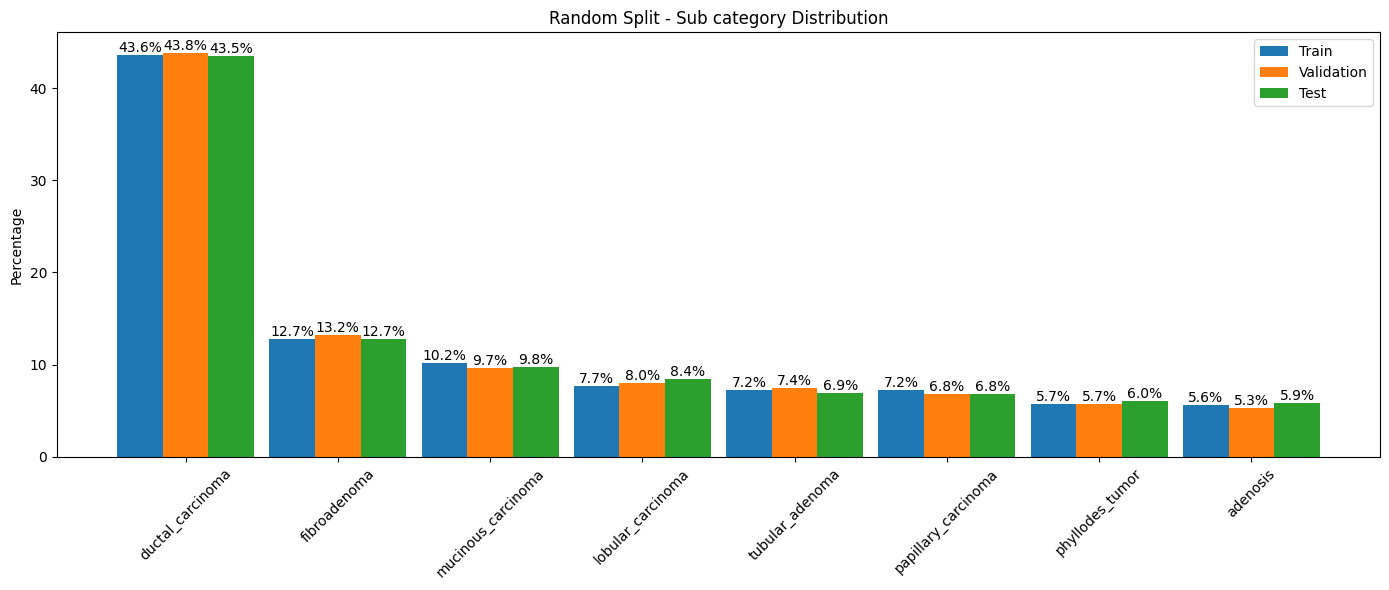

In [24]:
# Random split
train_r, val_r, test_r = strat.split_random()
random_splits = {
    "Train": train_r["subtype"].value_counts().to_dict(),
    "Validation": val_r["subtype"].value_counts().to_dict(),
    "Test": test_r["subtype"].value_counts().to_dict()
}
strat.plot_subtype_distribution(random_splits, "Random Split - Sub category Distribution")

# Stratified split by sub category

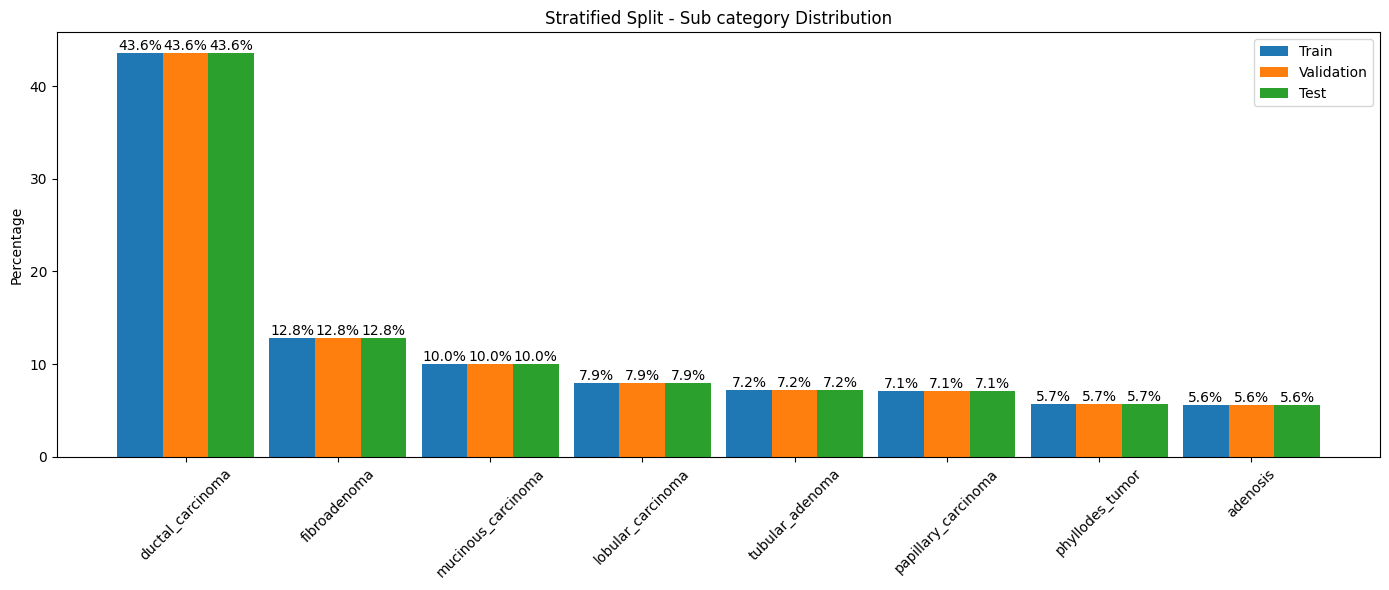

In [25]:
# Stratified split
train_s, val_s, test_s = strat.split_stratified()
stratified_splits = {
    "Train": train_s["subtype"].value_counts().to_dict(),
    "Validation": val_s["subtype"].value_counts().to_dict(),
    "Test": test_s["subtype"].value_counts().to_dict()
}
strat.plot_subtype_distribution(stratified_splits, "Stratified Split - Sub category Distribution")

In [26]:
print("Thank you for using the Stratification Splitting Notebook.")

Thank you for using the Stratification Splitting Notebook.
